In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# used for scaling data set
from sklearn import preprocessing

# StandardScaler
from sklearn.preprocessing import StandardScaler

# used for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Data set split
from sklearn.model_selection import train_test_split

# PCA
from sklearn.decomposition import PCA

# Logistic
from sklearn.linear_model import LogisticRegression

# performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("creditcard 2.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
data.shape

(284807, 31)

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

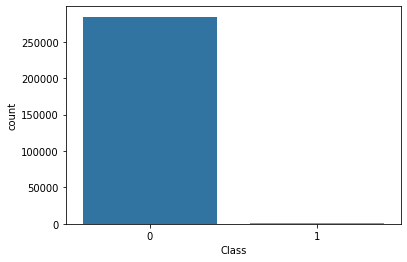

In [10]:
sns.countplot("Class", data=data)

In [11]:
X_data = data.iloc[:,0:30]
y_data = data.iloc[:,-1]

#### Standard scaler

In [12]:
standard_scaler = preprocessing.StandardScaler()
X_standard_scaled_df = standard_scaler.fit_transform(X_data)

In [13]:
X_standard_scaled_df

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [14]:
X_standard_scaled_df = pd.DataFrame(data=X_standard_scaled_df[:,:], columns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])  # 1st row as the column names

In [15]:
X_standard_scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


Dimentionality reduction: Feature extraction
    - PCA
    - T-SNE




    - Consider using GridSearchCV for Cross Validation

In [107]:
# Make an instance of the Model
pca = PCA(3)

pca_selected = pca.fit_transform(X_standard_scaled_df)
# pca_selected_df = pca.fit(selected_df)

In [108]:
print(pca_selected.shape)

(284807, 3)


In [109]:
print(pca.n_components_)

3


In [110]:
pca_selected_df = pd.DataFrame(data=pca_selected[:,:])

In [111]:
pca_selected_df.head()

,0,1,2
0,0.459311,-2.351081,-0.462042
1,-0.329406,-2.097915,0.719767
2,1.774656,-2.656670,-0.117501
3,0.311401,-1.790116,1.302024
4,-0.017933,-1.407785,0.894533


In [112]:
ready_data = pca_selected_df.join(y_data)

In [113]:
ready_data.shape

(284807, 4)

In [114]:
ready_data.columns

Index([0, 1, 2, 'Class'], dtype='object')

In [115]:
data_class_0 = ready_data[ready_data['Class']==0]

In [116]:
data_class_0.shape

(284315, 4)

In [117]:
data_class_1 = ready_data[ready_data['Class']==1]

In [118]:
data_class_1.shape

(492, 4)

In [119]:
data_class_0.head()

,0,1,2,Class
0,0.459311,-2.351081,-0.462042,0
1,-0.329406,-2.097915,0.719767,0
2,1.774656,-2.656670,-0.117501,0
3,0.311401,-1.790116,1.302024,0
4,-0.017933,-1.407785,0.894533,0


In [120]:
# Since the number of fraud transactions are too little in compare to non-fraud, 
# I make sure that they are distributed equally in both train and test set

X_0 = data_class_0.iloc[:,0:-1]  #independent columns
y_0 = data_class_0.iloc[:,-1]    #target column i.e Class

X_1 = data_class_1.iloc[:,0:-1]  #independent columns
y_1 = data_class_1.iloc[:,-1]    #target column i.e Class

# def train_gen():
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.33, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.33, random_state=42)



# train_data = pd.merge(X_train, y_train, left_index=True, right_index=True)
# test_data = pd.concat([X_test,y_test], axis=1)

In [121]:
X_train_0.head()

,0,1,2
129701,-0.355424,-0.955053,-0.749431
31479,-0.246327,-1.040911,-0.307747
71978,-0.525575,-0.969242,-0.978017
146747,0.193639,-0.642444,-0.104231
26850,-0.331340,-0.140274,0.573647


In [122]:
X_train = pd.concat([X_train_0, X_train_1])
y_train = pd.concat([y_train_0, y_train_1])
X_test = pd.concat([X_test_0 , X_test_1])
y_test = pd.concat([y_test_0 , y_test_1])

In [123]:
X_train.shape

(190820, 3)

In [124]:
y_train.shape

(190820,)

In [125]:
X_test.shape

(93987, 3)

In [126]:
y_test.shape

(93987,)

In [127]:
# train_data = X_train.join(y_train)
# test_data = X_test.join(y_test)

In [128]:
# train_data.shape

In [129]:
# test_data.shape

### Becasue the dataset is toooooooo imbalanced, we use technics
- undersampling
- oversampling

https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/


https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

#### Precision vs Recall

instagram post to be reviewed

In [88]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [89]:
# check version number
import imblearn
# print(imblearn.__version__)

In [90]:
from imblearn.under_sampling import RandomUnderSampler # doctest: +NORMALIZE_WHITESPACE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification

### Random Undersampling Imbalanced Datasets

In [142]:
...
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [143]:
# summarize class distribution
print(Counter(y_train))

Counter({0: 190491, 1: 329})


In [144]:
...
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X_train, y_train)

In [145]:
# summarize class distribution
print(Counter(y_over))

Counter({0: 329, 1: 329})


### Combining over and under sampling

In [131]:
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.1)
# fit and apply the transform
X_over, y_over = over.fit_resample(X_train, y_train)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_under, y_under = under.fit_resample(X_over, y_over)

In [132]:
print(Counter(y_under))

Counter({0: 38098, 1: 19049})


considering that data is different ranges
we should do scaling - Session 15 (cheat Robust scaler)


The other thing is that the portion of negative to positive is too big so we need to make sure that the model does nor overfit to negative

Next is Classification
- Logistic
- SVM
- Random FOrrest
- Decision tree
- XGBoost



#### Logistic Regression using pca df

In [133]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression()

In [146]:
logit_model = logisticRegr.fit(X_over, y_over)

In [147]:
logit_predict = logisticRegr.predict(X_test)

In [148]:
logit_predict

array([0, 0, 0, ..., 0, 0, 1])

In [149]:
X_test.shape

(93987, 3)

In [150]:
logisticRegr.score(X_test, y_test)

0.7369955419366508

In [151]:
confusion_matrix(y_test, logit_predict)

array([[69181, 24643],
       [   76,    87]])

In [152]:
accuracy_score(y_test, logit_predict)

0.7369955419366508

In [153]:
print(classification_report(y_test, logit_predict))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85     93824
           1       0.00      0.53      0.01       163

    accuracy                           0.74     93987
   macro avg       0.50      0.64      0.43     93987
weighted avg       1.00      0.74      0.85     93987



In [154]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [177]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [206]:
XGB_classifier = XGBClassifier(n_estimators=10000, learning_rate=.01, maximize=True)
XGB_classifier.fit(X_over,y_over, eval_metric = 'aucpr')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3, maximize=True,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [207]:
XGB_classifier_predict = XGB_classifier.predict(X_test)

In [208]:
XGB_classifier_predict

array([0, 0, 0, ..., 1, 1, 1])

In [209]:
print(XGB_classifier.score(X_over,y_over))
print(np.sqrt(mean_squared_error(XGB_classifier_predict,y_test)))

0.9924012158054711
0.5185443573145204


In [210]:
accuracy_score(y_test,XGB_classifier_predict)

0.7311117494972709

In [215]:
classification_report(y_test,XGB_classifier_predict)

'              precision    recall  f1-score   support\n\n           0       1.00      0.73      0.84     93824\n           1       0.00      0.69      0.01       163\n\n    accuracy                           0.73     93987\n   macro avg       0.50      0.71      0.43     93987\nweighted avg       1.00      0.73      0.84     93987\n'

In [217]:
# XGB_model = XGBRegressor(n_estimators=1000, learning_rate=.05)
# XGB_model.fit(X_over,y_over)

In [218]:
# pred_train_XGB = XGB_model.predict(X_test)

In [219]:
# pred_train_XGB

In [220]:
# print(XGB_model.score(X_over,y_over))
# print(np.sqrt(mean_squared_error(pred_train_XGB,y_test)))

In [185]:
# accuracy_score(y_test,pred_train_XGB)

In [187]:
# classification_report(pred_train_XGB,y_test)

Performance:
- Accuracy, precission, recall

Deep Learning:
- KERAS
- 